In [22]:
## 肆、1.資料整理
import pandas as pd
import numpy as np
data_df = pd.read_csv("D:/heart_failure_clinical_records_dataset.csv")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


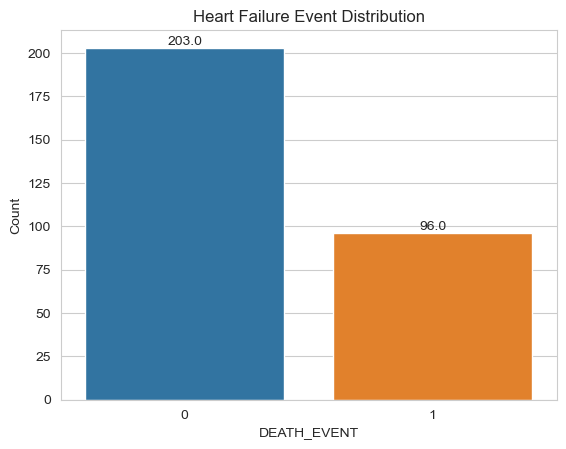

0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [23]:
## 肆、2.目標值分析
import matplotlib.pyplot as plt
import seaborn as sns
# 設置圖表樣式為白色格線
sns.set_style("whitegrid")
# 目標值頻率計算
target_counts = heart['DEATH_EVENT'].value_counts()
# 目標值分布圖表
ax = sns.countplot(x='DEATH_EVENT', data=heart)
# 在柱狀圖上顯示數值
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
plt.title('Heart Failure Event Distribution')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.show()
print(target_counts)

In [21]:
## 肆、3.區分訓練集和測試集
from sklearn.model_selection import train_test_split

# 將特徵變數存儲在 X 中
X = heart.drop('DEATH_EVENT', axis=1)

# 將目標變數存儲在 y 中
y = heart['DEATH_EVENT']

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 計算測試集佔全部資料的百分比
test_percentage = len(X_test) / len(heart) * 100


# 打印訓練集和測試集的筆數
print("訓練集的筆數:", len(X_train))
print("測試集的筆數:", len(X_test))
# 打印測試集佔全部資料的百分比
print("測試集佔全部資料的百分比:", test_percentage)

訓練集的筆數: 239
測試集的筆數: 60
測試集佔全部資料的百分比: 20.066889632107024


In [50]:
## 1.預測心臟衰竭的發生
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# 讀取資料集
heart = pd.read_csv("D:/heart_failure_clinical_records_dataset.csv")
# 定義特徵變數 X 和目標變數 y
X = heart.drop('DEATH_EVENT', axis=1)
y = heart['DEATH_EVENT']
# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 建立邏輯迴歸模型並訓練
model = LogisticRegression()
model.fit(X_train, y_train)
# 在測試集上進行預測
y_pred = model.predict(X_test)
# 計算預測準確率和其他評估指標
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['survive', 'death'])
# 輸出結果
print("預測準確率:", accuracy)
print(report)


預測準確率: 0.8
              precision    recall  f1-score   support

     survive       0.77      0.94      0.85        35
       death       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



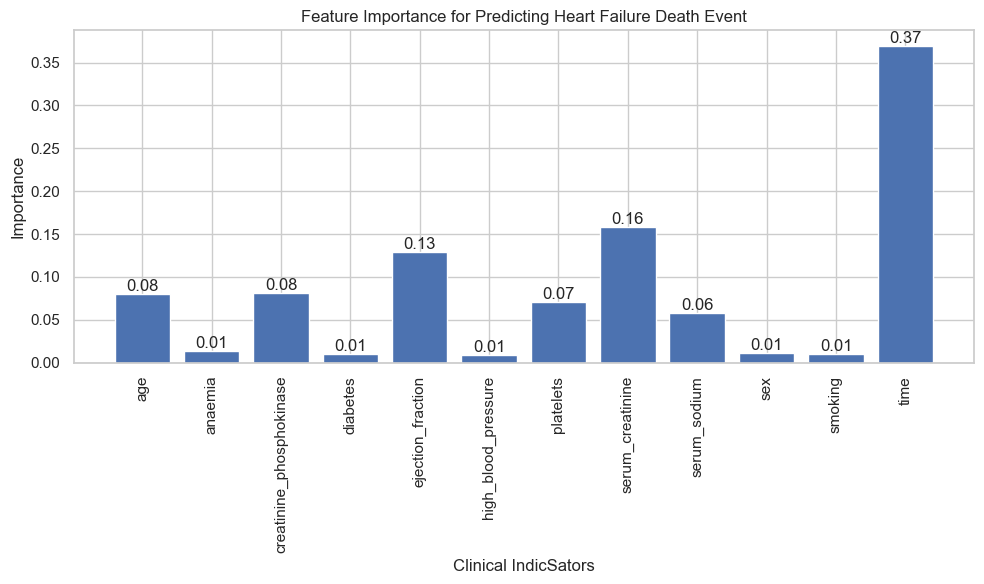

In [43]:
## 2.預測心臟衰竭死亡事件的臨床指標影響
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# 建立隨機森林分類器模型
model = RandomForestClassifier()
# 訓練模型
model.fit(X_train, y_train)
# 獲取特徵重要性
feature_importance = model.feature_importances_
# 建立特徵名稱列表
feature_names = X.columns
# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Clinical IndicSators')
plt.ylabel('Importance')
plt.title('Feature Importance for Predicting Heart Failure Death Event')
# 在長條上顯示數值
for i, v in enumerate(feature_importance):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [51]:
## 3.影響機率較高的變數對於預測心臟衰竭患者的存活時間是否具有重有影響力？
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
import pandas as pd
import numpy as np
# 讀取數據集
heart = pd.read_csv("D:/heart_failure_clinical_records_dataset.csv")
# 選擇特徵和目標變數
features = ["age", "serum_creatinine", "ejection_fraction", "time"]
target = "time"
X = heart[features]
y = heart[target]
# 建立線性回歸模型
model = LinearRegression()
# 使用交叉驗證進行預測
y_pred = cross_val_predict(model, X, y, cv=5)
# 計算均方誤差
mse = mean_squared_error(y, y_pred)
print("均方誤差:", mse)
# 特徵重要性分析
model.fit(X, y)
feature_importance = model.coef_
# 輸出特徵重要性結果
for i, feature in enumerate(features):
    print(f"{feature}的重要性: {feature_importance[i]}")

均方誤差: 1.5246649783216405e-27
age的重要性: -3.1054569122624727e-16
serum_creatinine的重要性: -1.1051258622003896e-14
ejection_fraction的重要性: -1.505141735380232e-16
time的重要性: 0.9999999999999996


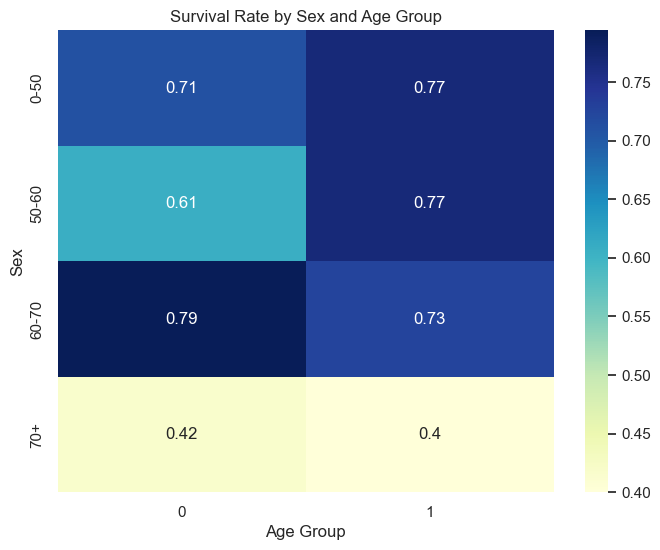

In [79]:
## 4.不同性別/年齡組別的心臟衰竭患者的存活率是否有差異？
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 讀取資料集
data = pd.read_csv("D:/heart_failure_clinical_records_dataset.csv")
# 定義年齡分組值和標籤
age_groups = [0, 50, 60, 70, 100]
age_labels = ['0-50', '50-60', '60-70', '70+']
# 計算存活率
grouped_data = data.groupby([pd.cut(data['age'], age_groups, labels=age_labels), 'sex'])['DEATH_EVENT'].apply(lambda x: (x == 0).mean()).unstack()
# 繪製熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(grouped_data, annot=True, cmap='YlGnBu')
plt.title("Survival Rate by Sex and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Sex")
plt.show()

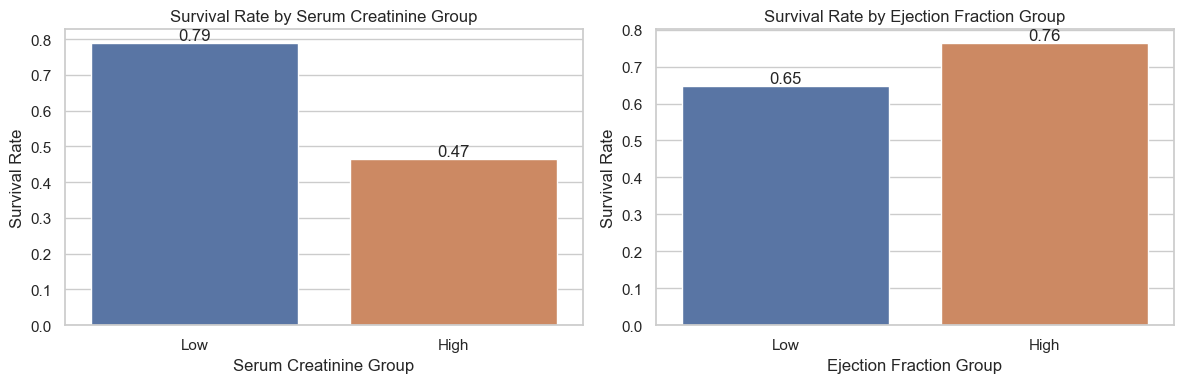

In [69]:
## 5.不同的血清肌酸酐濃度和射血分數對心臟衰竭患者的存活率有重大影響嗎？
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 讀取心臟衰竭數據集
heart = pd.read_csv("D:/heart_failure_clinical_records_dataset.csv")
# 定義分組的區間邊界和標籤
serum_creatinine_bins = [-float('inf'), 1.2, float('inf')]
ejection_fraction_bins = [-float('inf'), 40, float('inf')]
labels = ['Low', 'High']
# 創建新的特徵"serum_creatinine_group"，將血清肌酸酐濃度分為低和高兩組
heart['serum_creatinine_group'] = pd.cut(heart['serum_creatinine'], bins=serum_creatinine_bins, labels=labels)
# 創建新的特徵"ejection_fraction_group"，將射血分數分為低和高兩組
heart['ejection_fraction_group'] = pd.cut(heart['ejection_fraction'], bins=ejection_fraction_bins, labels=labels)
# 按照血清肌酸酐濃度組計算存活率
serum_creatinine_survival_rate = 1 - heart.groupby('serum_creatinine_group')['DEATH_EVENT'].mean()
# 按照射血分數組計算存活率
ejection_fraction_survival_rate = 1 - heart.groupby('ejection_fraction_group')['DEATH_EVENT'].mean()
# 繪製存活率直方圖
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 繪製血清肌酸酐濃度組的存活率直方圖
sns.barplot(x=serum_creatinine_survival_rate.index, y=serum_creatinine_survival_rate.values, ax=axes[0])
axes[0].set_title("Survival Rate by Serum Creatinine Group")
axes[0].set_xlabel("Serum Creatinine Group")
axes[0].set_ylabel("Survival Rate")
# 繪製射血分數組的存活率直方圖
sns.barplot(x=ejection_fraction_survival_rate.index, y=ejection_fraction_survival_rate.values, ax=axes[1])
axes[1].set_title("Survival Rate by Ejection Fraction Group")
axes[1].set_xlabel("Ejection Fraction Group")
axes[1].set_ylabel("Survival Rate")
# 在條形頂部添加數值
for ax in axes:
    for i, v in enumerate(ax.patches):
        if not pd.isnull(v.get_height()) and v.get_height() != float('inf'):
            ax.text(v.get_x() + v.get_width() / 2, v.get_height(), f"{v.get_height():.2f}", ha='center', va='bottom')
# 調整子圖間的間距
plt.tight_layout()
# 顯示圖表
plt.show()